In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import gradientdescent as gd
from sklearn import preprocessing

import matplotlib.pyplot as plt

In [2]:
data_inicial = pd.read_csv('./admission.csv')
data_inicial.head()
for i in data_inicial:
    print(i)

Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


In [3]:
# Comenzar con un poquito de exploración
data_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
no_usar = 'Chance of Admit '
data_continuar = data_inicial.drop(no_usar, 1)
data_continuar.head(1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1


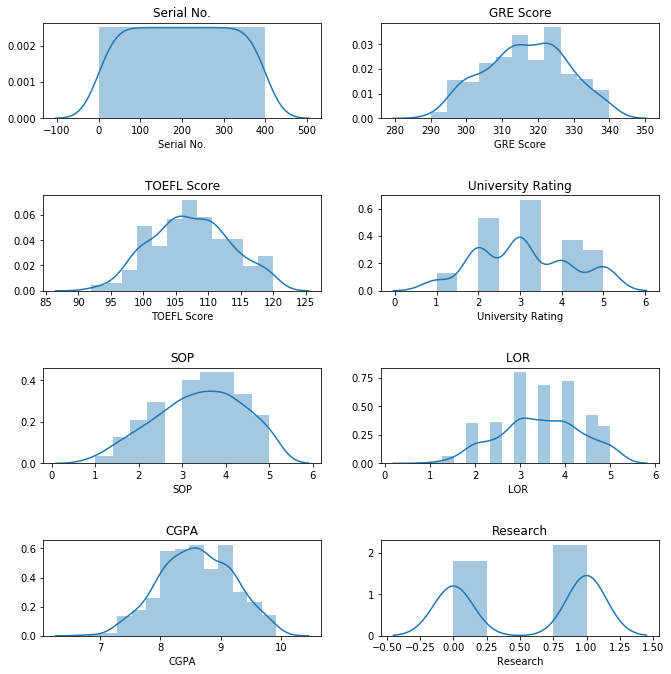

In [5]:
# COLUMNA GRE SCORE 

axis = []

cont = 1
fig = plt.figure(figsize=(10,10))
for i in data_continuar:
    axtemp = fig.add_subplot(4,2,cont)
    fig.tight_layout(pad=3.0)
    sns.distplot(data_continuar[i])
    plt.title(i)
    cont += 1

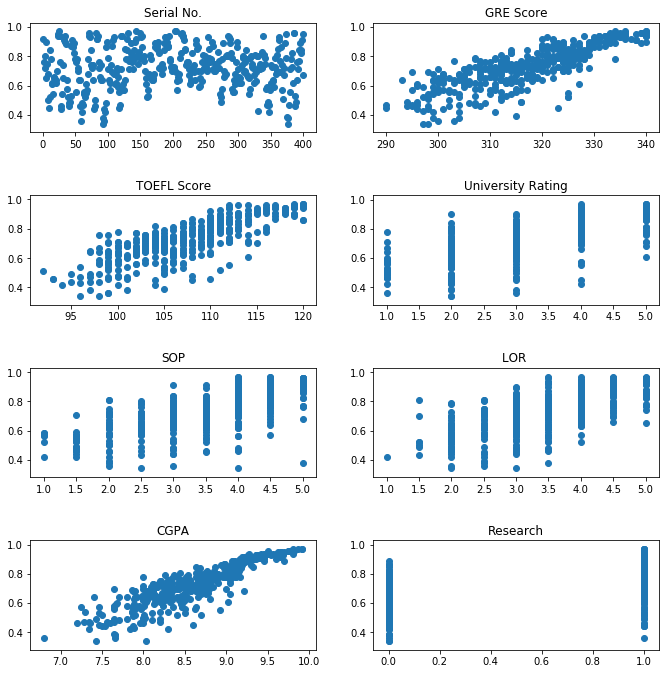

In [6]:
axis = []

cont = 1
fig = plt.figure(figsize=(10,10))
for i in data_continuar:
    axtemp = fig.add_subplot(4,2,cont)
    fig.tight_layout(pad=3.0)
    plt.scatter(data_inicial[i], data_inicial['Chance of Admit '])
    plt.title(i)
    cont += 1

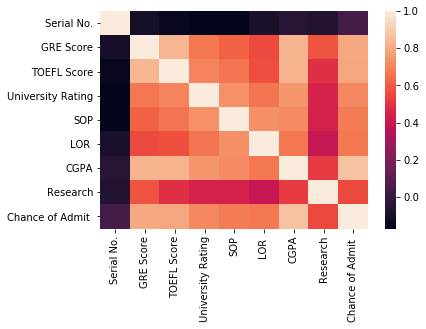

In [7]:
core = data_inicial.corr()
sns.heatmap(core)

In [8]:
data_inicial.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
# NORMALIZACION DE LAS VARIABLES 

data_normal = data_inicial.copy()
variables = ['GRE Score','TOEFL Score','University Rating','SOP',
             'LOR ','CGPA','Research']

features = data_normal[variables].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
features_n = min_max_scaler.fit_transform(features)
normalizado = pd.DataFrame(features_n, columns=variables)

In [10]:
normalizado.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


In [13]:
# EMPEZAR A HACER UN MODELO LINEAL SIMPLE 

costos = []
def simple_model(name, alpha, it, delta, l, total, numero):
    m,_ = data_inicial.shape
    x = normalizado[name].to_numpy().reshape(m,1)
    ys = data_inicial['Chance of Admit '].to_numpy().reshape(m,1)
    # recibo la data 
    xs = np.hstack((np.ones(m).reshape(m,1), x))
    # inicializar en 0,0 este caso es especifico de 2 
    thetas = [0,0]

    res = gd.gradient_descent(xs, ys, thetas, alpha, it, delta, l)
    final = res[len(res) - 1][1]
    costos.append(res[len(res) - 1][2])
    print(final)
    axtemp = fig.add_subplot(total,1,numero)
    plt.scatter(x,ys)
    x = np.linspace(0,1,100)
    y = final[1] * x + final[0]
    plt.plot(x, y, '-r')
    plt.show()

[[0.4587279 ]
 [0.49556116]]


<ipython-input-13-a5debc7d8b49>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axtemp = fig.add_subplot(total,1,numero)


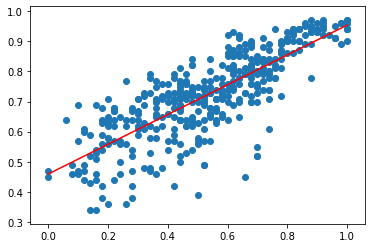

[[0.44100874]
 [0.5150438 ]]


<ipython-input-13-a5debc7d8b49>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axtemp = fig.add_subplot(total,1,numero)


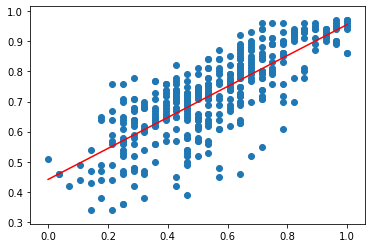

[[0.539262  ]
 [0.35466458]]


<ipython-input-13-a5debc7d8b49>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axtemp = fig.add_subplot(total,1,numero)


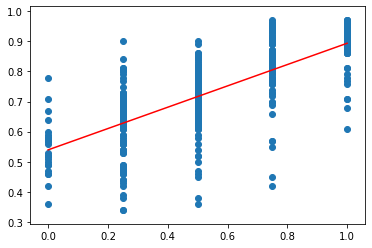

[[0.49497541]
 [0.38231586]]


<ipython-input-13-a5debc7d8b49>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axtemp = fig.add_subplot(total,1,numero)


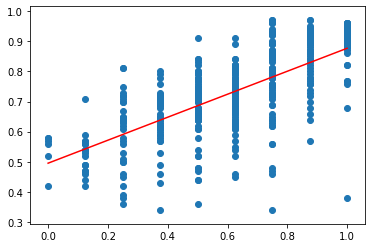

[[0.46515345]
 [0.42283939]]


<ipython-input-13-a5debc7d8b49>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axtemp = fig.add_subplot(total,1,numero)


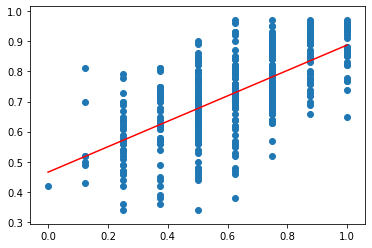

[[0.36151273]
 [0.62989964]]


<ipython-input-13-a5debc7d8b49>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axtemp = fig.add_subplot(total,1,numero)


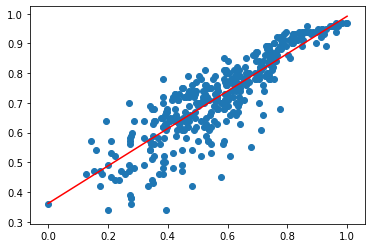

no
891
[[0.63767955]
 [0.15830219]]


<ipython-input-13-a5debc7d8b49>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axtemp = fig.add_subplot(total,1,numero)


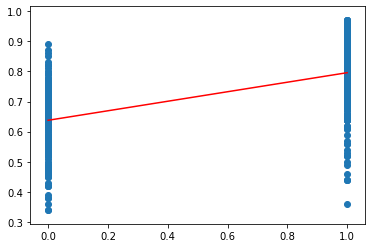

In [14]:
total = len(variables)
for i in range(total):
    simple_model(variables[i], 0.1, 1000, 0, 0, total, i + 1)

In [16]:
costos

[0.0036094261613287327,
 0.003788068627291774,
 0.005012033314250971,
 0.005511734288311028,
 0.00559163279284434,
 0.002416316562665595,
 0.007039111676631631]